<a href="https://colab.research.google.com/github/cemyeniceri/FuelConsumption/blob/master/MergedLogging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import io
import numpy as np
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving LOG-01-027-03C-04A-054-09C-1158-1204IST_IZM_Merged.CSV to LOG-01-027-03C-04A-054-09C-1158-1204IST_IZM_Merged.CSV


In [5]:
uploaded["LOG-01-027-03C-04A-054-09C-1158-1204IST_IZM_Merged.CSV"]

b'Engine Speed - (G28),Engine Load,Injection Timing,Throttle Valve Angle,Intake Air - Temperature (G42),Vehicle Speed,Fuel Consumption - Equivalent,Boost Pressure - (actual),Engine Torque - (actual)\n /min, %, ms, %,\xef\xbf\xbdC, km/h,, mbar, Nm\n1760,94,2.55,20.8,24,80,176,1310,172.7\n1760,92.5,2.55,20.8,24,81,176,1300,170.7\n1800,91,2.55,20.4,24,82,176,1310,170.7\n1840,88.7,2.55,19.6,24,84,172,1310,166.8\n1840,77.4,2.29,18,24,85,172,1290,139.7\n1880,60.2,1.79,14.1,24,87,156,1250,106.7\n1920,57.1,1.53,12.9,24,88,156,1190,98.9\n1920,12.8,0.51,4.7,24,88,78,1080,0\n1880,12.8,0,4.7,25,87,78,1040,0\n1880,12.8,0,4.3,26,85,0,1040,0\n1760,13.5,0,4.3,26,80,0,1030,0\n1640,14.3,0,4.3,27,75,0,1030,0\n1600,14.3,0,4.3,27,73,0,1030,0\n1560,14.3,0,4.3,27,72,0,1020,0\n1600,52.6,1.79,16.9,27,72,20,1020,71.8\n1600,67.7,2.04,16.1,27,73,20,1080,122.2\n1600,66.2,1.79,14.5,27,73,116,1140,116.4\n1600,90.2,2.55,22.7,26,74,116,1140,157.1\n1800,121.8,4.08,100,26,75,116,1270,213.4\n2040,127.1,3.83,63.9,26,78,18

In [0]:
df = pd.read_csv(io.StringIO(uploaded['LOG-01-027-03C-04A-054-09C-1158-1204IST_IZM_Merged.CSV'].decode('utf-8')))

In [19]:
df = df.drop(df.index[0])
df.head(5)


,Engine Speed - (G28),Engine Load,Injection Timing,Throttle Valve Angle,Intake Air - Temperature (G42),Vehicle Speed,Fuel Consumption - Equivalent,Boost Pressure - (actual),Engine Torque - (actual)
1,1760,94,2.55,20.8,24,80,176.0,1310,172.7
2,1760,92.5,2.55,20.8,24,81,176.0,1300,170.7
3,1800,91,2.55,20.4,24,82,176.0,1310,170.7
4,1840,88.7,2.55,19.6,24,84,172.0,1310,166.8
5,1840,77.4,2.29,18,24,85,172.0,1290,139.7


In [0]:
from sklearn import preprocessing

In [0]:
y = df['Fuel Consumption - Equivalent']

X = df.drop(['Fuel Consumption - Equivalent'], axis=1)

# normalize the data attributes
normalized_X = preprocessing.normalize(X)

In [22]:
y.head(3)

1    176.0
2    176.0
3    176.0
Name: Fuel Consumption - Equivalent, dtype: float64

In [0]:
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train.shape

(12608, 8)

In [26]:
X_test.shape

(3152, 8)

In [27]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)
print()

MSE: 721.5877



Text(0, 0.5, 'Deviance')

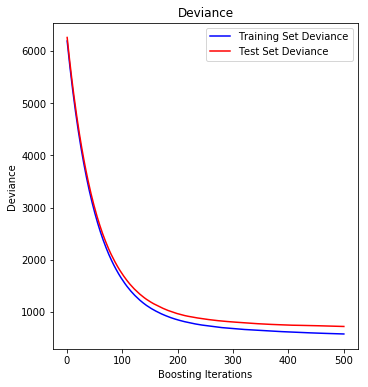

In [28]:
# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

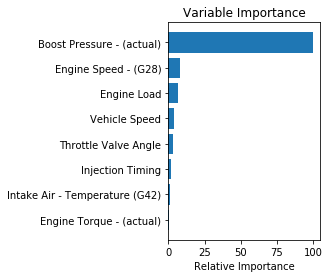

In [29]:
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns.values[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()